# <center>Credit Score Classification</center>

### Problem Statement
- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task
- Given a person’s credit-related information, build a machine learning model that can classify the credit score.

## Table of content 
- Importing Packages
- Reading Data 
- Data Exploration
- Data cleaning 
- Data Preprocessing 
- Modeling & Evaluation

## Importing Packages

In [1]:
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [27]:
# Packages options
sns.set_theme(rc={'figure.figsize': [9, 4.5]}, font_scale = 1.2) # Standard figure size for all

In [ ]:
# np.seterr(divide='ignore', invalid='ignore', over='ignore')

# import warnings 
# warnings.filterwarnings("ignore")

## Reading the Data

In [3]:
train_df = pd.read_csv("../data/train.csv",low_memory = False)
train_df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [74]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Data Exploration

In [4]:
train_df.shape

(100000, 28)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [75]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [10]:
train_df.duplicated().sum()

0

### EDA - Categorical Columns

In [21]:
def plot_histogram_categorical(column_name: str):
    plt.title(f"Histogram - {column_name}")
    plt.ylabel("Count")
    sns.countplot(x = column_name, data = train_df, palette="mako")
    plt.xticks(rotation = 90)
    plt.show()

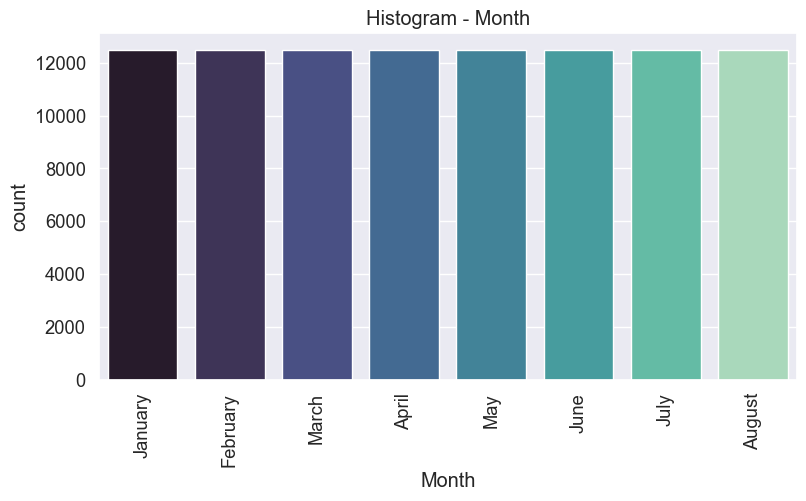

In [28]:
plot_histogram_categorical("Month")

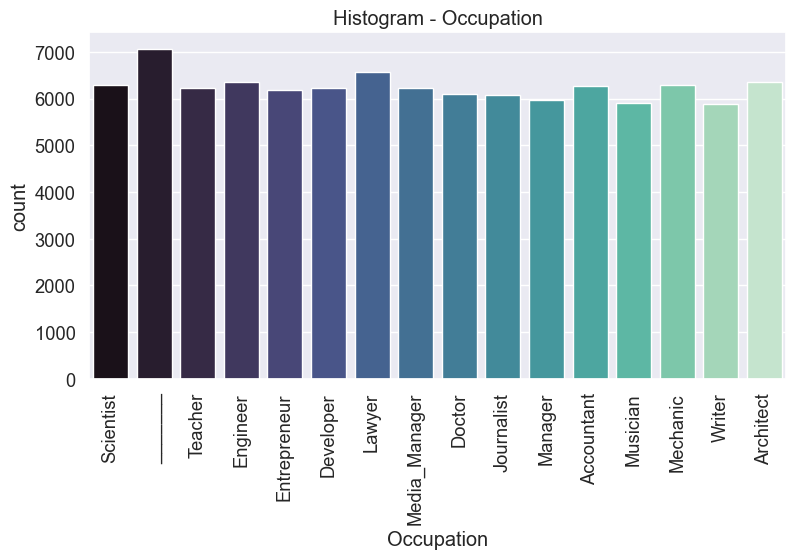

In [31]:
plot_histogram_categorical("Occupation")

In [32]:
print(train_df["Type_of_Loan"].nunique())
list(train_df["Type_of_Loan"].unique()[:5])

6260


['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Not Specified',
 nan]

**Issue** - Type_of_Loan - multiple categorical values clubbed together for a single entry

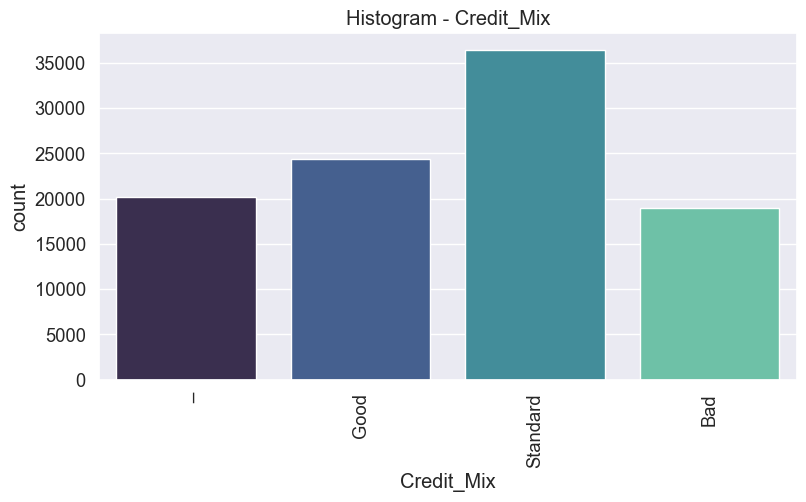

In [33]:
plot_histogram_categorical("Credit_Mix")

**Issue** - Credit_Mix - null values replaced with "-"

In [38]:
print(train_df["Credit_History_Age"].nunique())
train_df["Credit_History_Age"].unique()[:5]

404


array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months'], dtype=object)

**Issue** - Credit_History_Age - values expressed as "x Years and y Months", not suitable for processing

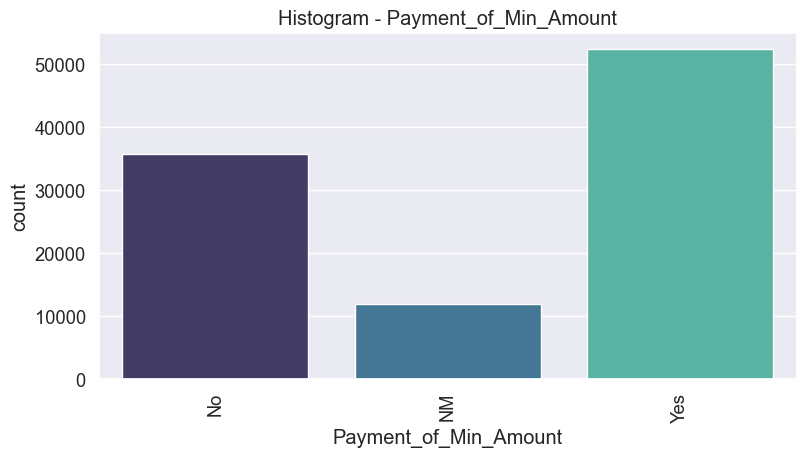

In [39]:
plot_histogram_categorical("Payment_of_Min_Amount")

**Issue** - Payment_of_Min_Amount - "No" misspelled as "NM" for some observations

In [40]:
print(train_df["Amount_invested_monthly"].nunique())
print(train_df["Amount_invested_monthly"].unique()[:5])

91049
['80.41529543900253' '118.28022162236736' '81.699521264648'
 '199.4580743910713' '41.420153086217326']


**Issue** - Amount_invested_monthly - values should be numerical

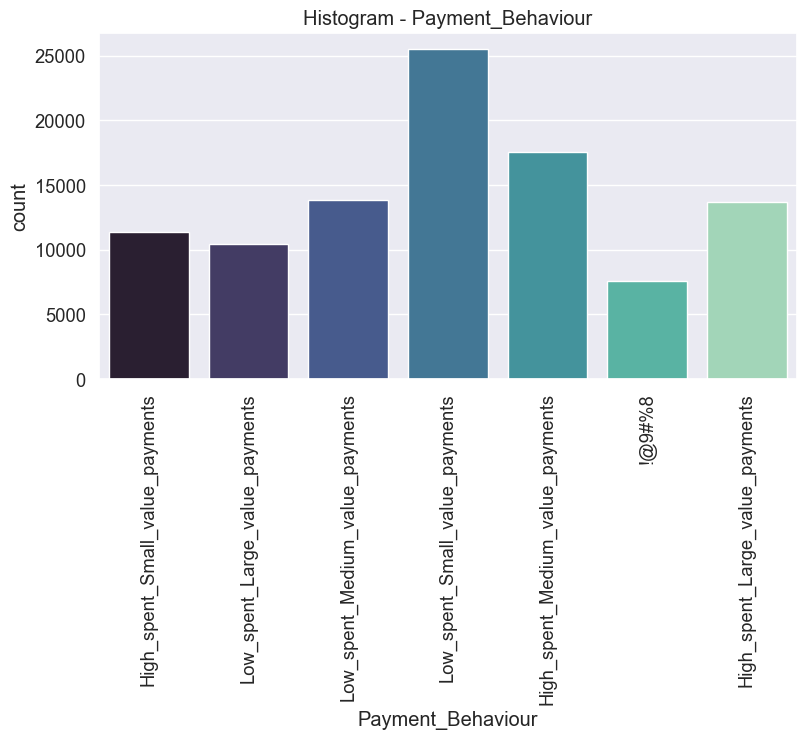

In [41]:
plot_histogram_categorical("Payment_Behaviour")

In [42]:
train_df["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

**Issue** - Payment_Behaviour - null values represented by "!@9#%8"

In [43]:
print(train_df["Monthly_Balance"].nunique())
print(train_df["Monthly_Balance"].unique()[:5])

98792
['312.49408867943663' '284.62916249607184' '331.2098628537912'
 '223.45130972736786' '341.48923103222177']


### Plotting The Target 

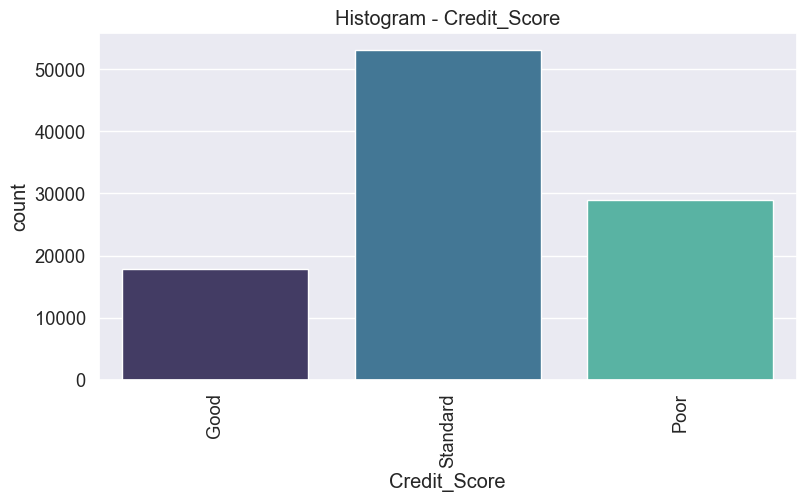

In [44]:
plot_histogram_categorical("Credit_Score")

In [45]:
train_df['Credit_Score'].value_counts(normalize=True) * 100

Standard    53.174
Poor        28.998
Good        17.828
Name: Credit_Score, dtype: float64

**Issue** - Credit_Score - Class imbalance

### EDA - Numerical Columns

In [46]:
def plot_histogram_numerical(column_name: str, ylim: tuple = None):
    plt.title(f"{column_name} - Distribution of Values")
    if ylim:
        plt.ylim(ylim)
    sns.histplot(train_df[column_name], kde=True)

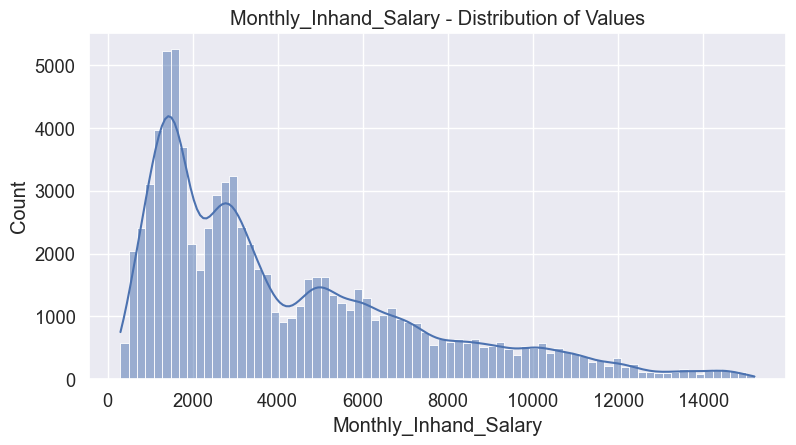

In [47]:
plot_histogram_numerical("Monthly_Inhand_Salary")

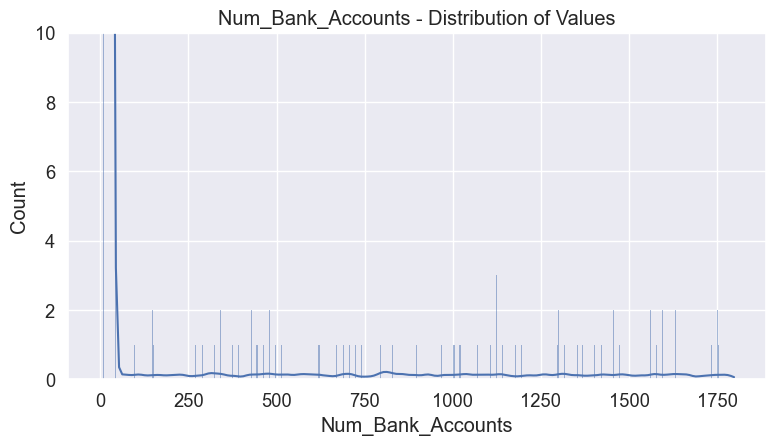

In [48]:
plot_histogram_numerical("Num_Bank_Accounts", (0, 10))

In [68]:
(train_df["Num_Bank_Accounts"] < 0).sum()

21

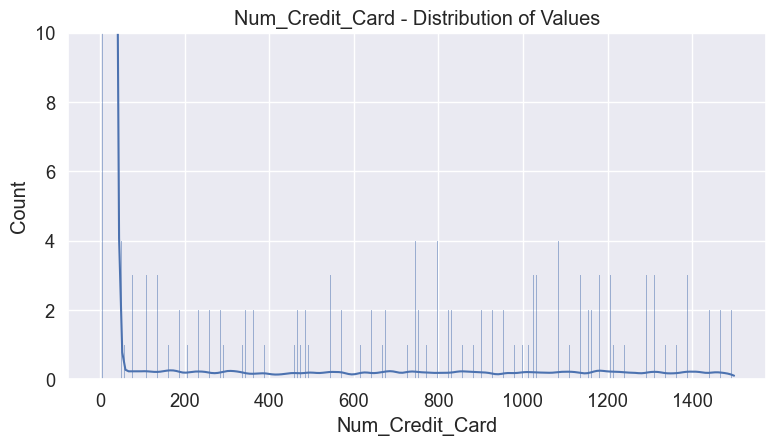

In [50]:
plot_histogram_numerical("Num_Credit_Card", (0, 10))

In [62]:
(train_df["Num_Credit_Card"] == 0).sum()

13

**Issue** - Num_Credit_Card - there are people with 0 credit cards

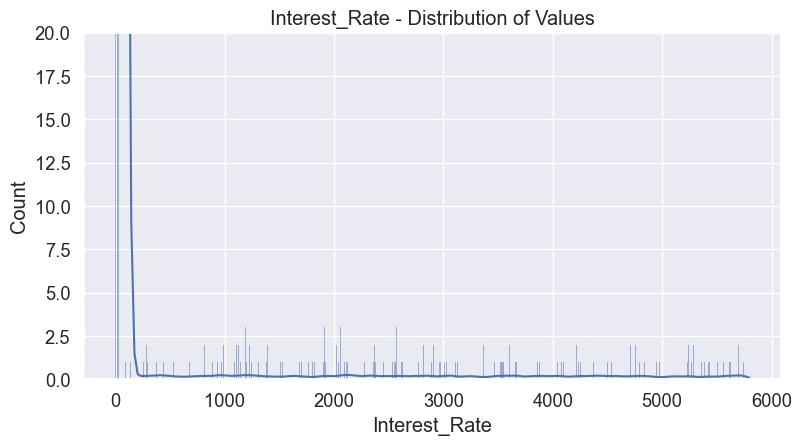

In [63]:
plot_histogram_numerical("Interest_Rate", (0, 20))

In [66]:
(train_df["Interest_Rate"] > 100).sum()

2012

**Issue** - Interest_Rate - there are observations with a very high interest rate value (~2000 observations with Interest Rate > 100)

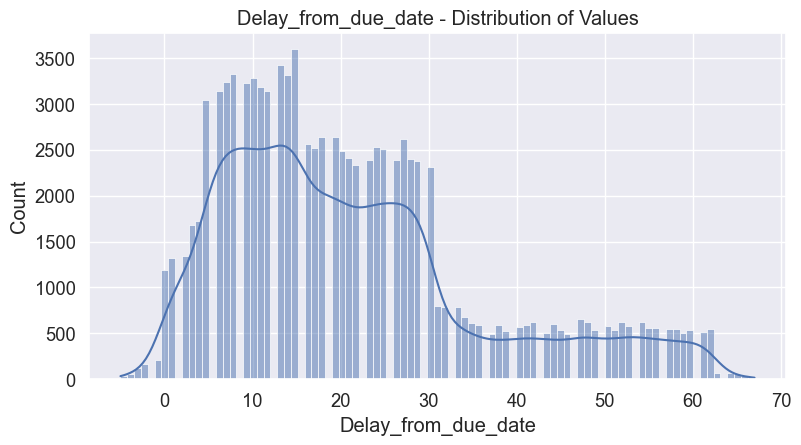

In [67]:
plot_histogram_numerical("Delay_from_due_date")

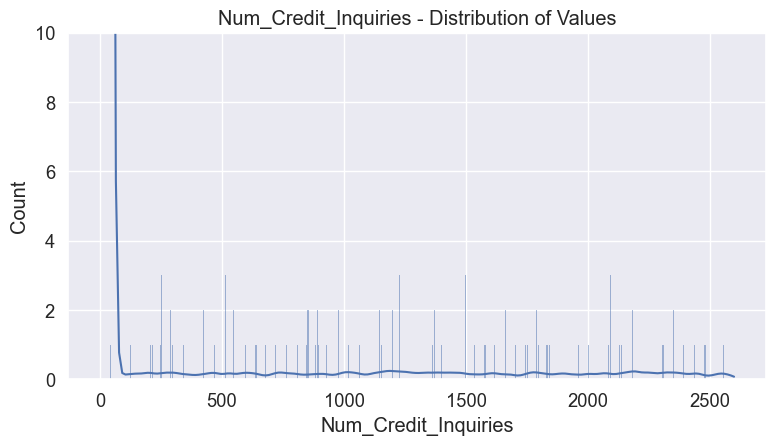

In [70]:
plot_histogram_numerical("Num_Credit_Inquiries", (0, 10))

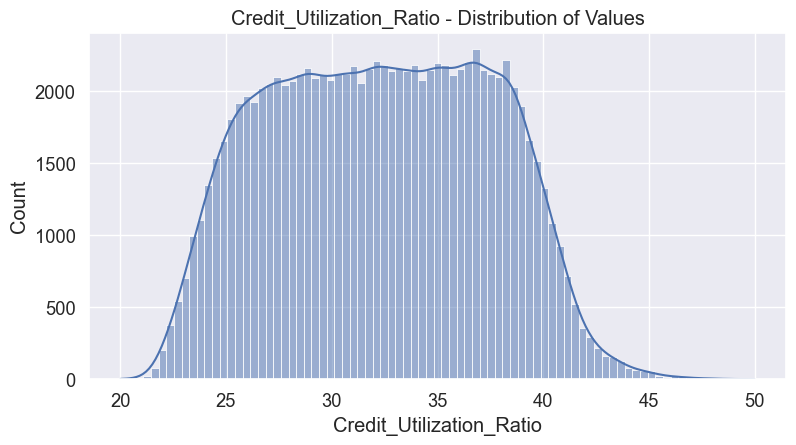

In [71]:
plot_histogram_numerical("Credit_Utilization_Ratio")

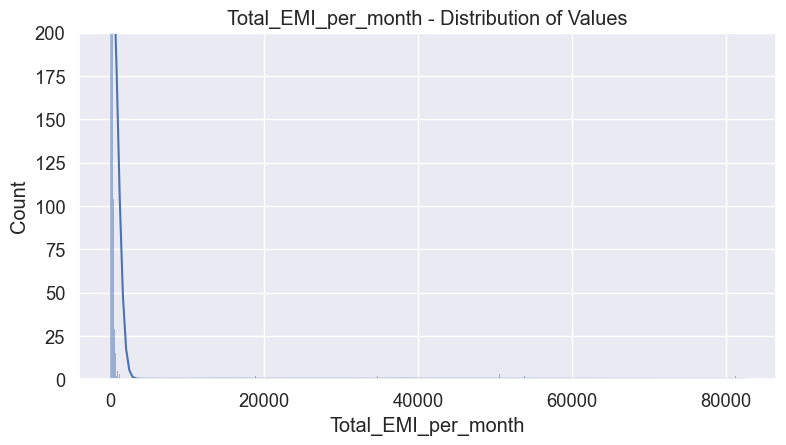

In [72]:
plot_histogram_numerical("Total_EMI_per_month", (0, 200))

# Data Preprocessing

### Handling Catogerical 

In [ ]:
train_df.select_dtypes(include="object")

In [ ]:
train_df['Credit_Score'].value_counts()

In [ ]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [ ]:
train_df['Credit_Score'] = train_df['Credit_Score'].map(m)

In [ ]:
del train_df['Customer_ID']

In [ ]:
train_df = pd.get_dummies(train_df,drop_first=True)

In [ ]:
train_df.info()

In [ ]:
# df.to_csv("Preprocessed_Data.csv")

In [ ]:
train_df = pd.read_csv("../input/credit-score-data-preprocessed/Preprocessed_Data.csv",low_memory=False)

### Data Spliting 
- Try Resampling 

In [ ]:
# define dataset
X, y = train_df.drop("Credit_Score",axis=1).values , train_df["Credit_Score"] 

## Apply oversampling
- Data is Not 100% balanced, Let's try improving it. 

In [ ]:
y.value_counts(normalize=True)

In [ ]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [ ]:
y_data_rus.value_counts(normalize=True)

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

### Handling Numerical 
- Using Power transformer to avoid Data Skewness

In [ ]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [ ]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# Modeling and Evaluation


#### Model Building

In [ ]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

#### Model fitting

In [ ]:
model.fit(X_train, y_train)

#### model evaluation

In [ ]:
print("Train Score: ",model.score(X_train, y_train))

In [ ]:
print("Test Score: ",model.score(X_test, y_test))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

#### model Saving

In [ ]:
# joblib.dump(model,'model.h5')
# joblib.dump(scalar,'scalar.h5')